**Exercícios Rotulação de Componentes Conexos**
exercícios obtidos em http://homepages.inf.ed.ac.uk/rbf/HIPR2/label.htm


1. Implemente o algoritmo de rotulação de componentes conexos (algoritmo do slide ou por outra solução) e aplique sobre a imagem binária art8.png. Indique qual vizinhança será considerada (4 ou 8)
Mostre os resultados na forma da imagem art8lab1.png e art8lab2.png

art8.png: 
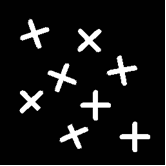
art8lab1.png: 
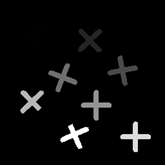
art8lab2.png: 
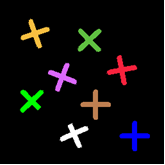
		

Tamanho da imagem :  (256, 256)


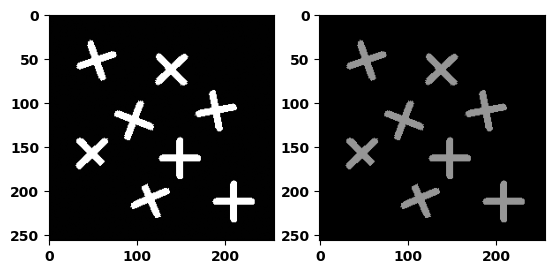

In [ ]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

img = cv2.imread("art8.png", cv2.IMREAD_GRAYSCALE)
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

linhas = img.shape[0]
colunas = img.shape[1]

print('Tamanho da imagem : ',img.shape) 


nova_imagem = np.zeros((linhas, colunas), dtype=int)

def dfs(imagem, x, y, visitado=None):
    if visitado is None:
        visitado = set()
    
    if imagem[x][y] == 255:
        visitado.add((x,y))
        vizinhos = [(x+1,y), (x-1,y), (x,y+1), (x,y-1), (x+1,y+1), (x+1,y-1), (x-1,y+1), (x-1,y-1)]
        for vizinho in vizinhos:
            if (vizinho not in visitado) and (imagem[vizinho[0]][vizinho[1]] == 255):
                    dfs(imagem, vizinho[0], vizinho[1], visitado)
            return visitado

    

def pinta(imagem, visitado, cor=None):
    if cor is None:
        cores = [250, 225, 200, 175, 150, 125, 100, 75]
        cor = random.choice(cores)

    linhas = imagem.shape[0]
    colunas = imagem.shape[1]
    nova_imagem = np.zeros((linhas, colunas), dtype=int)
    for v in visitado:
        nova_imagem[v[0]][v[1]] = cor

    return nova_imagem

conjunto = set()

for i in range(linhas):
    for j in range(colunas):
        if img[i][j] == 255:
            dfs(img, i, j, visitado=conjunto)
        
for i in conjunto:
    nova_imagem = pinta(img, conjunto, cor=None)

plt.subplot(1, 2, 2)
plt.imshow(nova_imagem, cmap='gray', vmin=0, vmax=255)

#for (i in range)


2. Calcule o número de objetos da imagem clc3.png. Note que antes será necessário binarizar a imagem. Para isso, considere um limiar (*threshold*) de 67, isto é, valores acima de 67 na imagem original recebem zero, e os abaixo recebem 1 (o que resulta na imagem clc3thr1.png).

clc3.png
![clc3.png](clc3.png)
clc3thr1
![clc3thr1.png](clc3thr1.png)
clc3lab1
![clc3lab1.png](clc3lab1.png)
		

In [138]:
# code here

3. Calcule a distância média entre os objetos da imagem anterior. Mostre um histograma com as distâncias e o valor médio.

In [139]:
# code here

4. Mostra a Transformada Distância da imagem do exercício 1